In [3]:
# Importing libraries 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fractions import Fraction
from tqdm import tqdm

## Creation and Training of the NN

In [4]:
# Loading the MNIST dataset and splitting into training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

In [5]:
#x_train, x_test = x_train / 255.0, x_test / 255.0 # Rescaling the data from range [0, 255] to [0, 1] for normalization
print(x_train.shape) # Displaying the shape of the training data

(60000, 28, 28)


In [6]:
# Defining a function to transform the labels to a specific format
def transform_y(y):
    out = [1]*10 # Initialize a list of 1s with length 10 (for each digit class)
    out[y] = 255  # Setting the position of the true class to 10 (like in Anderson's article)
    return out

In [7]:
# Setting a random seed for reproducibility
tf.random.set_seed(123)

In [8]:
# Setting the different variables for the model
IMAGE_SIZE = 28 * 28
HIDDEN_LAYER_SIZE = 40
NUM_EPOCH = 50
BATCH_SIZE = 300
LEARNING_RATE = 0.01 / 255

In [9]:
# Defining the input layer for the neural network with the shape of each flattened image
input_layer = Input(shape=(IMAGE_SIZE,)) 

In [10]:
# Initializing weights and biases for the layers with normal distribution
weight_initializer_1 = RandomNormal(mean=0.0, stddev=1.0/tf.sqrt(float(IMAGE_SIZE)))
weight_initializer_2 = RandomNormal(mean=0.0, stddev=1.0/tf.sqrt(float(HIDDEN_LAYER_SIZE)))
bias_initializer = RandomNormal(mean=0.0, stddev=1.0)

In [11]:
# Adding a hidden layer with the custom activation and initialized weights and biases
hidden_layer = Dense(units=HIDDEN_LAYER_SIZE, activation=tf.nn.relu, kernel_initializer=weight_initializer_1, bias_initializer=bias_initializer)(input_layer)

In [12]:
# Adding the output layer with 10 units (one for each digit) and the same activation function
output_layer = Dense(units=10, activation=tf.nn.relu, kernel_initializer=weight_initializer_2, bias_initializer=bias_initializer)(hidden_layer)

In [13]:
# Creating the model by specifying inputs and outputs
model = Model(inputs=input_layer, outputs=output_layer) 

In [14]:
# Compiling the model with SGD optimizer and mean squared error loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [15]:
# Flattening the image data for model input and transforming labels using transform_y
x_train_flattened = x_train.reshape(-1, IMAGE_SIZE) # Flatten training images
y_train_transformed = np.array([transform_y(y) for y in y_train]) # Transform labels
x_test_flattened = x_test.reshape(-1, IMAGE_SIZE) # Flatten test images
y_test_transformed =  np.array([transform_y(y) for y in y_test]) # Transform labels

In [16]:
# Finding the index of the second occurrence of the digit '7' in the test set
#plot_index = next(i for (i, digit) in enumerate(y_test) if digit == 7) 
plot_index = [i for (i, digit) in enumerate(y_test) if digit == 7][1]
x_plot = x_test_flattened[plot_index] # Selecting the flattened test image of digit '7'

In [17]:
# Defining a callback class to collect model predictions at the start of each epoch
class PlotCollectorCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.predictions = []
    def on_epoch_begin(self, epoch, epoch_logs):
        prediction = self.model.predict(np.array([x_plot]), batch_size=0)[0]         
        # Predicting for the selected '7' image at each epoch and storing the result
        self.predictions.append(prediction)

In [18]:
# Instantiating the callback to collect predictions during training
plot_collector = PlotCollectorCallback() 

In [19]:
 # Training the model with the specified training data, epochs, batch size, and callback
history = model.fit(x_train_flattened, y_train_transformed, epochs=NUM_EPOCH, batch_size=BATCH_SIZE, callbacks=[plot_collector])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5592 - loss: 3762.1018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8152 - loss: 1808.4574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8609 - loss: 1469.8488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9448 - loss: 872.1338
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9516 - loss: 789.9509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 736.7610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9591 - loss: 698.6996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9610 - loss

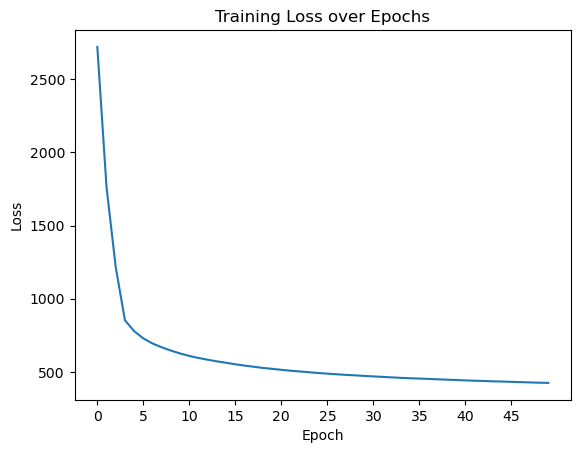

 Loss plot saved to: /Users/marie/Desktop/loss_plot.png


<Figure size 640x480 with 0 Axes>

In [20]:
losses = history.history["loss"]
epochs = list(range(NUM_EPOCH))
sns.lineplot(x=epochs, y=losses)

plt.xticks(ticks=np.arange(0, NUM_EPOCH, 5)) 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")

plt.grid(False)
plt.show()

#Save to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_path = os.path.join(desktop_path, "loss_plot.png")
plt.savefig(file_path, dpi=300)
print(f" Loss plot saved to: {file_path}")

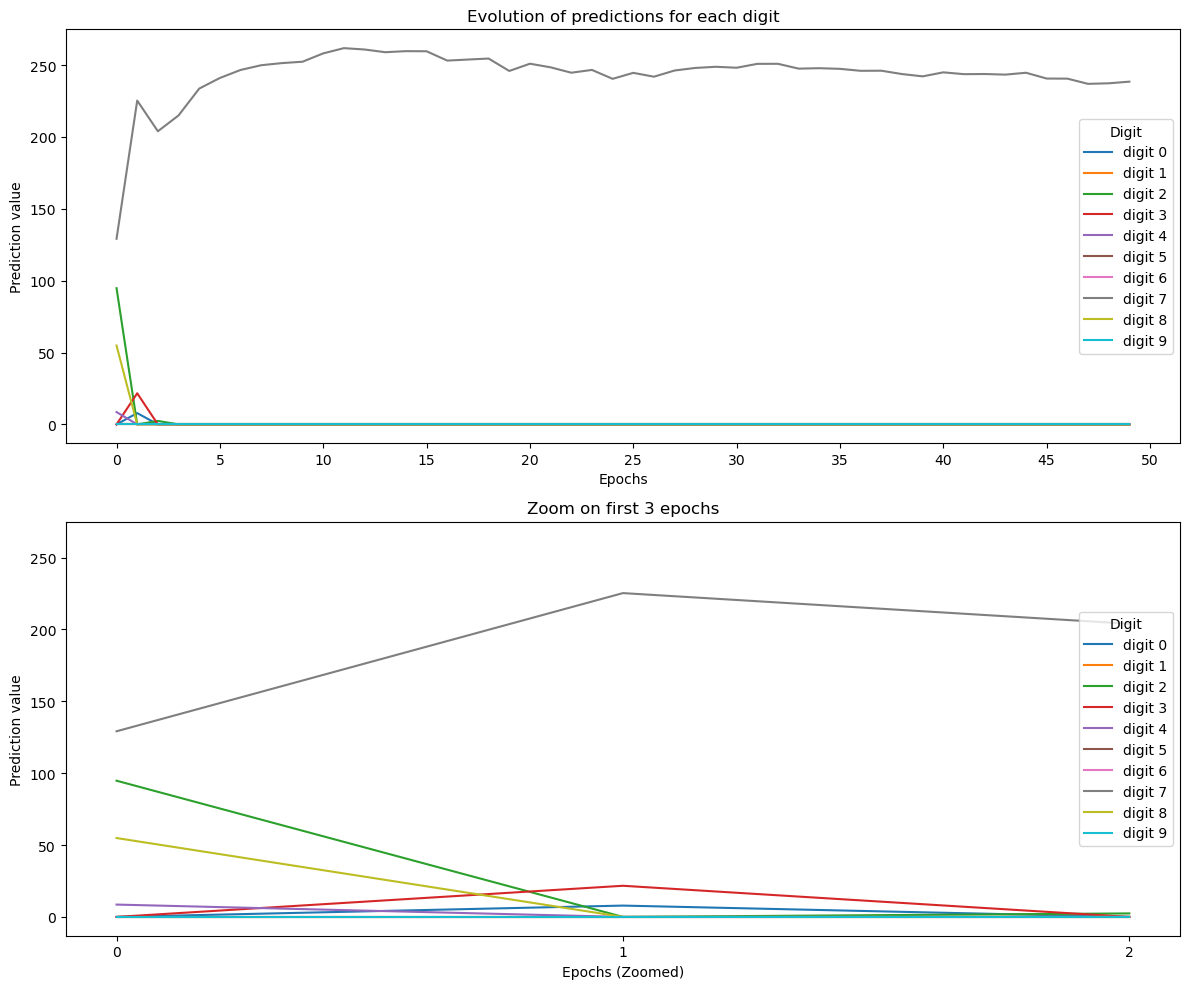

 Subplot figure saved to: /Users/marie/Desktop/prediction_subplots.png


In [21]:
# Data
plot_data = np.array(plot_collector.predictions)
epochs = np.arange(plot_data.shape[0])

# Create the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharey=True)

# Full range plot
for i in range(10):
    sns.lineplot(x=epochs, y=plot_data[:, i], label=f'digit {i}', ax=ax1)

ax1.set_xticks(np.arange(0, plot_data.shape[0] + 1, 5))
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Prediction value')
ax1.set_title('Evolution of predictions for each digit')
ax1.legend(title="Digit", loc='right')
ax1.grid(False)

# Zoom on first 3 epochs
for i in range(10):
    sns.lineplot(x=epochs[:3], y=plot_data[:3, i],label=f'digit {i}', ax=ax2)

ax2.set_xticks(np.arange(0, 3, 1))
ax2.set_xlabel('Epochs (Zoomed)')
ax2.set_ylabel('Prediction value')
ax2.set_title('Zoom on first 3 epochs')
ax2.legend(title="Digit", loc='right')
ax2.grid(False)

plt.tight_layout()
plt.show()

# Save the plot to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_path = os.path.join(desktop_path, "prediction_subplots.png")
fig.savefig(file_path, dpi=300)
print(f" Subplot figure saved to: {file_path}")

In [22]:
# Evaluating the model on the test set and printing the results
print(model.evaluate(x_test_flattened, y_test_transformed))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9626 - loss: 614.7880
[556.04248046875, 0.967199981212616]


## Translation of the NN into a CRN

In [23]:
# Retrieve all Dense layers from the model. 
dense_layers = [layer for layer in model.layers if hasattr(layer, 'get_weights') and len(layer.get_weights()) >= 2]

In [24]:
# Lists to store the CRN reactions and initial state for the bias species.
crn_reactions = []       # Each element: ([(coef, species), ...], [(coef, species), ...])
crn_initial_state = {}   # Dictionary: species -> initial count (bias value)

# For CRN generation, we treat the network as a series of transformations:
# The input to the first transformation is the external input (encoded as species x_0_i)
# and each dense layer transforms signals from layer l (x_l) to layer l+1.
for l, layer in enumerate(dense_layers):
    # Obtain the weight matrix and bias vector.
    # For a Dense layer, weights shape: (n_input, n_output) and biases shape: (n_output,)
    weights, biases = layer.get_weights()
    n_input, n_output = weights.shape

    # (1) Generate "copy" reactions to broadcast the input species to intermediate species.
    # For each input neuron i in layer l:
    for i in range(n_input):
        # Reaction for the positive signal:
        # x_l_i+ -> y_{l+1}_0_i+ + y_{l+1}_1_i+ + ... + y_{l+1}_{n_output-1}_i+
        prod_species = [(1, f"y_{l+1}_{j}_{i}+") for j in range(n_output)]
        crn_reactions.append(([(1, f"x_{l}_{i}+")], prod_species))
            
        # Reaction for the negative signal:
        # x_l_i- -> y_{l+1}_0_i- + y_{l+1}_1_i- + ... + y_{l+1}_{n_output-1}_i-
        prod_species = [(1, f"y_{l+1}_{j}_{i}-") for j in range(n_output)]
        crn_reactions.append(([(1, f"x_{l}_{i}-")], prod_species))
    
    # (2) For each output neuron j in the next layer (l+1):
    for j in range(n_output):
        # Add the bias to the initial state.
        # The species for bias depends on its sign.
        bias_val = biases[j]
        bias_species = f"s_{l+1}_{j}+" if bias_val >= 0 else f"s_{l+1}_{j}-"
        bias_amount = int(abs(bias_val)) #the number of molecules need to be an integer
        if bias_amount != 0:
            crn_initial_state[bias_species] = bias_amount

        # For each connection from input neuron i to output neuron j:
        for i in range(n_input):
            weight_val = weights[i, j]

            # Determine the sign for the weight.
            weight_sign = '+' if weight_val >= 0 else '-'
            # Express the magnitude of the weight as a rational number p/q.
            frac = Fraction(float(abs(weight_val))).limit_denominator(255)
            p, q = frac.numerator, frac.denominator

            # Add reactions corresponding to the weight scaling.
            if weight_sign == '+':
                # For positive weight:
                # (q, y_{l+1}_{j}_{i}+) -> (p, s_{l+1}_{j}+)
                crn_reactions.append(([(q, f"y_{l+1}_{j}_{i}+")], [(p, f"s_{l+1}_{j}+")]))
                # (q, y_{l+1}_{j}_{i}-) -> (p, s_{l+1}_{j}-)
                crn_reactions.append(([(q, f"y_{l+1}_{j}_{i}-")], [(p, f"s_{l+1}_{j}-")]))
            else:
                # For negative weight: swap the output sign.
                # (q, y_{l+1}_{j}_{i}+) -> (p, s_{l+1}_{j}-)
                crn_reactions.append(([(q, f"y_{l+1}_{j}_{i}+")], [(p, f"s_{l+1}_{j}-")]))
                # (q, y_{l+1}_{j}_{i}-) -> (p, s_{l+1}_{j}+)
                crn_reactions.append(([(q, f"y_{l+1}_{j}_{i}-")], [(p, f"s_{l+1}_{j}+")]))
        # (3) Add the RELU reactions:
        # Reaction: s_{l+1}_{j}+ -> m_{l+1}_{j} + x_{l+1}_{j}+
        crn_reactions.append(([(1, f"s_{l+1}_{j}+")], [(1, f"m_{l+1}_{j}"), (1, f"x_{l+1}_{j}+")]))
        # Reaction: m_{l+1}_{j} + s_{l+1}_{j}- -> x_{l+1}_{j}-
        crn_reactions.append(([(1, f"m_{l+1}_{j}"), (1, f"s_{l+1}_{j}-")], [(1, f"x_{l+1}_{j}-")]))

In [25]:
# For demonstration, print out the generated set of reactions and the initial bias states.
print("Generated Chemical Reaction Network (only displaying first and last 10 reactions):")
for inputs, outputs in crn_reactions[:10] + crn_reactions[-10:]:
    # Format the reaction as: "[(coef, species), ...] -> [(coef, species), ...]"
    inputs_str = ", ".join([f"({coef}, {spec})" for coef, spec in inputs])
    outputs_str = ", ".join([f"({coef}, {spec})" for coef, spec in outputs])
    print(f"{inputs_str} -> {outputs_str}")

Generated Chemical Reaction Network (only displaying first and last 10 reactions):
(1, x_0_0+) -> (1, y_1_0_0+), (1, y_1_1_0+), (1, y_1_2_0+), (1, y_1_3_0+), (1, y_1_4_0+), (1, y_1_5_0+), (1, y_1_6_0+), (1, y_1_7_0+), (1, y_1_8_0+), (1, y_1_9_0+), (1, y_1_10_0+), (1, y_1_11_0+), (1, y_1_12_0+), (1, y_1_13_0+), (1, y_1_14_0+), (1, y_1_15_0+), (1, y_1_16_0+), (1, y_1_17_0+), (1, y_1_18_0+), (1, y_1_19_0+), (1, y_1_20_0+), (1, y_1_21_0+), (1, y_1_22_0+), (1, y_1_23_0+), (1, y_1_24_0+), (1, y_1_25_0+), (1, y_1_26_0+), (1, y_1_27_0+), (1, y_1_28_0+), (1, y_1_29_0+), (1, y_1_30_0+), (1, y_1_31_0+), (1, y_1_32_0+), (1, y_1_33_0+), (1, y_1_34_0+), (1, y_1_35_0+), (1, y_1_36_0+), (1, y_1_37_0+), (1, y_1_38_0+), (1, y_1_39_0+)
(1, x_0_0-) -> (1, y_1_0_0-), (1, y_1_1_0-), (1, y_1_2_0-), (1, y_1_3_0-), (1, y_1_4_0-), (1, y_1_5_0-), (1, y_1_6_0-), (1, y_1_7_0-), (1, y_1_8_0-), (1, y_1_9_0-), (1, y_1_10_0-), (1, y_1_11_0-), (1, y_1_12_0-), (1, y_1_13_0-), (1, y_1_14_0-), (1, y_1_15_0-), (1, y_1_16_0

In [26]:
print("\nInitial State for Bias Species (only showing non-zero species):")
for species, count in crn_initial_state.items():
    print(f"{species}: {count}")


Initial State for Bias Species (only showing non-zero species):
s_1_0+: 1
s_1_2+: 1
s_1_11-: 1
s_1_14-: 1
s_1_30+: 1
s_1_33+: 1
s_1_34-: 1
s_1_39-: 2
s_2_0+: 1
s_2_2+: 1
s_2_5+: 1


In [27]:
def calculate_outputs(current_state, num_layers):
    output_results = {}
    output_prefix = f"x_{num_layers}_"
    prefix_len = len(output_prefix)

    for specie, count in current_state.items():
        # Check if the species name matches the output layer pattern and ends with +/-
        if specie.startswith(output_prefix) and specie[-1] in ['+', '-']:
            # Extract the base name (e.g., "x_2_0" from "x_2_0+" or "x_2_0-")
            base = specie[prefix_len:-1]
            # Initialize the base name in results if not seen before
            if base not in output_results:
                output_results[base] = 0
            # Add count for positive species, subtract for negative species
            if specie[-1] == '+':
                output_results[base] += count
            else: # specie[-1] == '-'
                output_results[base] -= count
    return output_results

def evaluate_with_history(sample_input):
    # Define the input multiset based on the sample input.
    input_multiset = {
        f"x_0_{i}+": int(sample_input[i]) # Assuming input species are x_0_i+
        for i in range(IMAGE_SIZE)
    }

    # Initialize the simulation state
    state = crn_initial_state.copy()

    # Add the input molecules to the state.
    for species, count in input_multiset.items():
        state[species] = state.get(species, 0) + count
    
    # Helper function to check if a reaction can be applied.
    def reaction_applicable(reactants, current_state):
        for coef, specie in reactants:
            if current_state.get(specie, 0) < coef:
                return False # Not enough reactant molecules
        return True # All reactants are sufficiently present

    output_history = []
    num_layers = len(dense_layers)
    #Simulation Loop
    iteration = 0
    while True:
        reaction_fired = False
        for reactants, products in crn_reactions:
            if reaction_applicable(reactants, state):
                # Consume reactants.
                for coef, specie in reactants:
                    state[specie] -= coef
                # Produce products.
                for coef, specie in products:
                    state[specie] = state.get(specie, 0) + coef
                reaction_fired = True # Mark that at least one reaction fired.
                
                
        current_outputs = calculate_outputs(state, num_layers)
        output_history.append(current_outputs)

        # If no reaction was fired in the entire pass through all rules, the system is stable.
        if not reaction_fired:
            break # Exit the simulation loop

        # Aggregate and Store Outputs for this Iteration
        iteration += 1

    # Final Output
    final_outputs = output_history[-1]
    print(f"\nSimulation finished after {iteration} iterations where reactions occurred.")
    print("Final Simulation Output (x_out = x_out+ - x_out-):")
    # Sort keys for consistent printing order
    for out_base in sorted(final_outputs.keys()):
        net_count = final_outputs[out_base]
        print(f"{out_base}: {net_count}")

    # Return the recorded history.
    return output_history

In [28]:
def plot_history(history, answer):
    history = np.array([[output.get(str(i), 0) for i in range(10)] for output in history])
    plot_data = np.array(history)
    epochs = np.arange(plot_data.shape[0])
    
    fig, ax = plt.subplots(figsize=(10, 6), sharey=True)
    
    for i in range(10):
        sns.lineplot(x=epochs, y=plot_data[:, i], label=f'digit {i}', ax=ax)
    
    ax.set_xticks(np.arange(0, plot_data.shape[0] + 1, 200))
    ax.set_xlabel('Evaulation step')
    ax.set_ylabel('Concentration value')
    ax.set_yscale('log')
    ax.set_title(f'Evolution of output species for each digit. (True digit: {answer})')
    ax.legend(title="Digit", loc='right')
    ax.grid(False)
    
    plt.tight_layout()
    plt.show()


Simulation finished after 1415 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 217
2: 218
3: 0
4: 0
5: 27
6: 0
7: 80
8: 0
9: 0


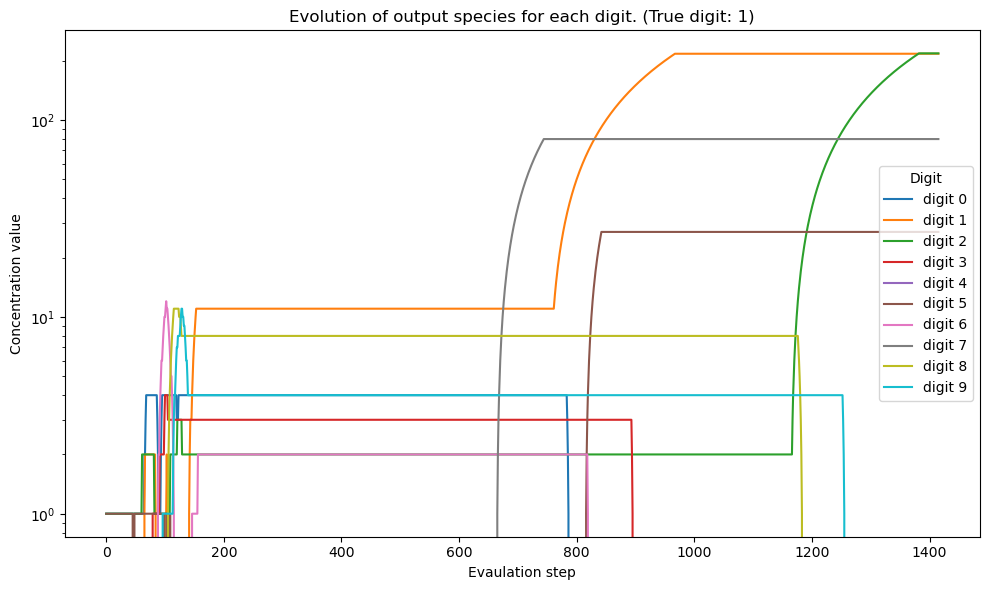

Plot saved to: /Users/marie/Desktop/digit_output_plot_4409.png


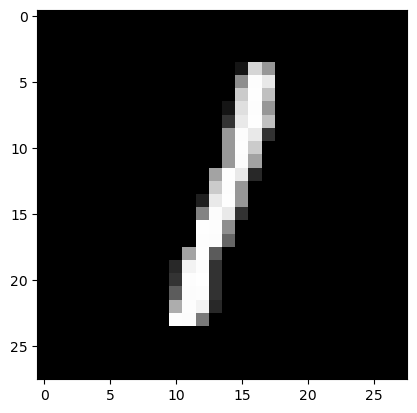

Answer 1
NN prediction [  0.      245.64499   0.        0.        0.        0.        0.
   0.        0.        0.     ]

Simulation finished after 2728 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 103
7: 0
8: 0
9: 0


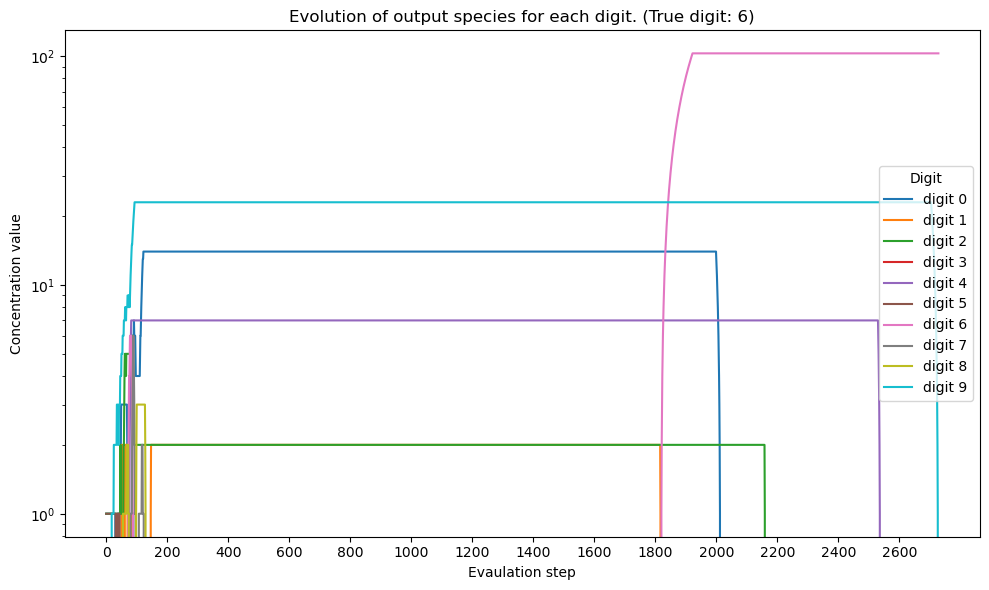

Plot saved to: /Users/marie/Desktop/digit_output_plot_368.png


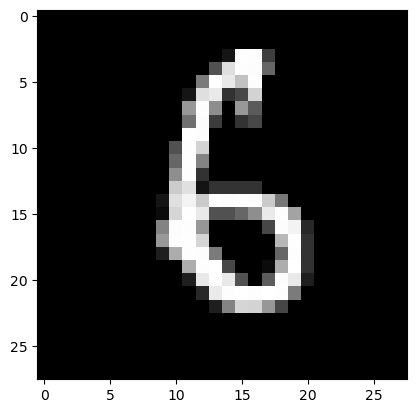

Answer 6
NN prediction [  0.        0.        0.        0.        0.        0.      245.66249
   0.        0.        0.     ]

Simulation finished after 1774 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 196
5: 0
6: 0
7: 9
8: 0
9: 0


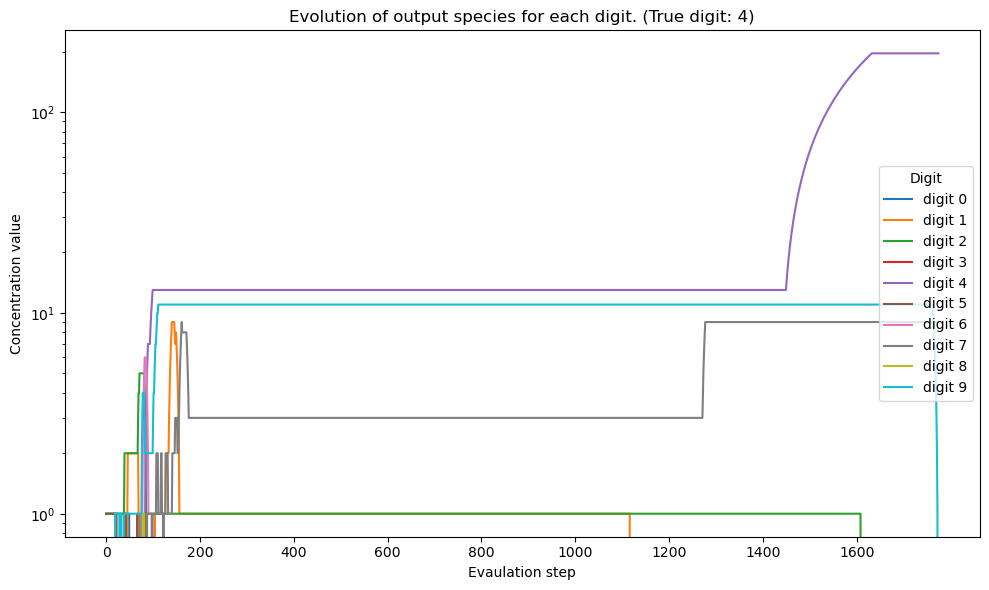

Plot saved to: /Users/marie/Desktop/digit_output_plot_3497.png


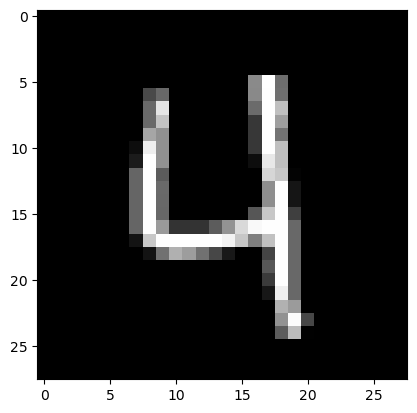

Answer 4
NN prediction [  0.        0.        0.        0.      227.33266   0.        0.
   0.        0.        0.     ]

Simulation finished after 4418 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 36
4: 0
5: 3
6: 0
7: 144
8: 111
9: 27


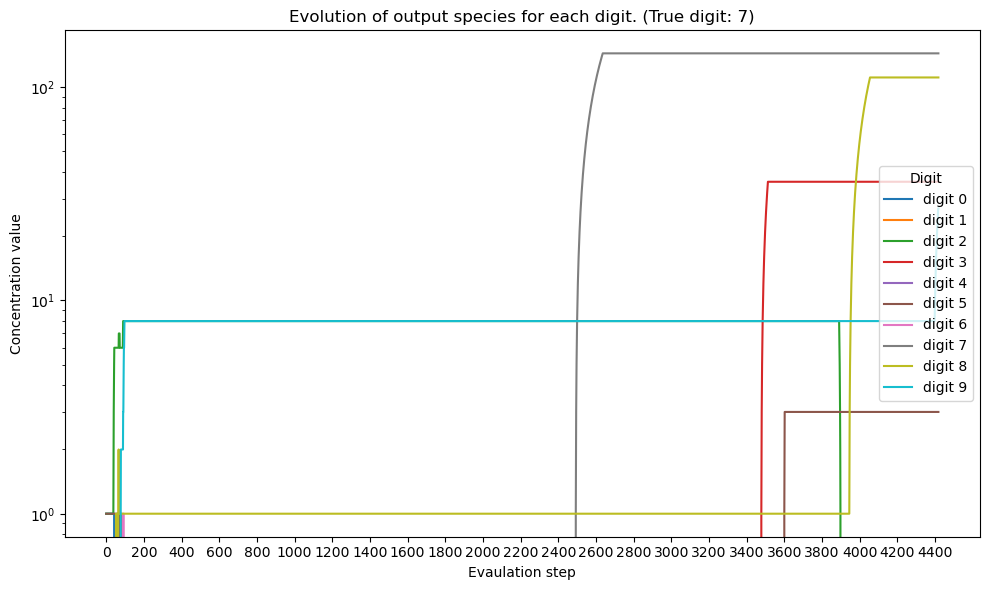

Plot saved to: /Users/marie/Desktop/digit_output_plot_4102.png


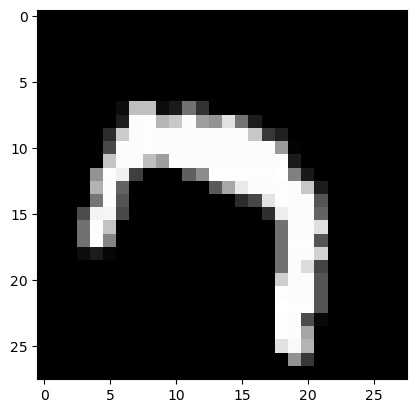

Answer 7
NN prediction [  0.         0.         0.        37.387596   0.         0.
   0.       112.038414   0.       137.63255 ]

Simulation finished after 2039 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 82
4: 0
5: 60
6: 0
7: 0
8: 0
9: 0


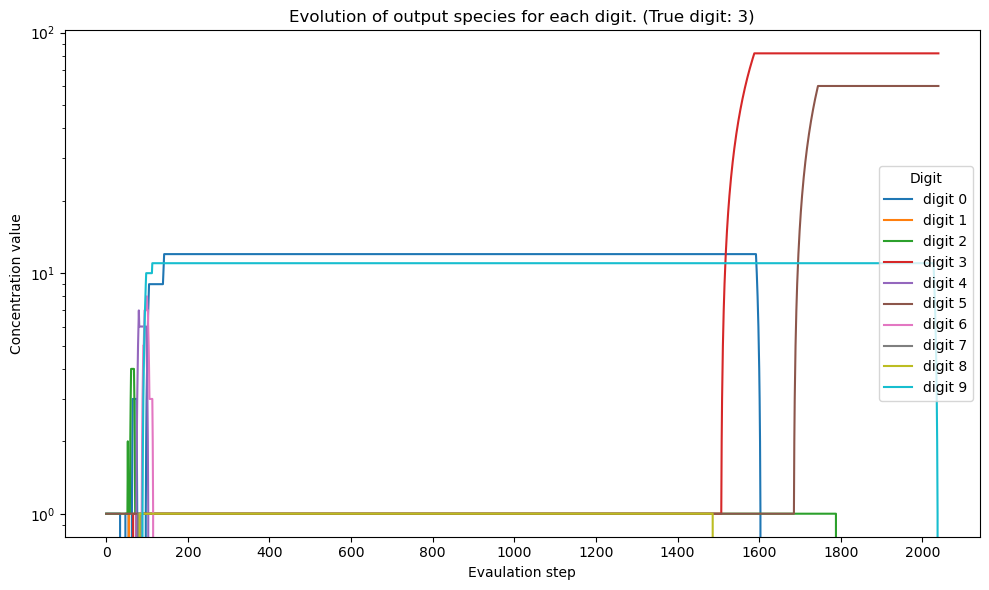

Plot saved to: /Users/marie/Desktop/digit_output_plot_4128.png


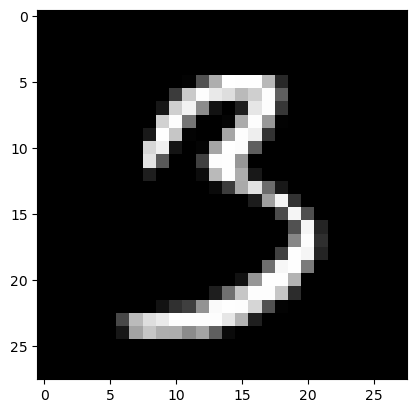

Answer 3
NN prediction [  0.       0.       0.     198.9016   0.       0.       0.       0.
   0.       0.    ]


In [29]:
for _ in range(5):
    i = np.random.randint(0, len(x_test_flattened))
    sample_input = x_test_flattened[i]
    history = evaluate_with_history(sample_input)
    plot_history(history, y_test[i])
    # Save to desktop
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
    filename = f"digit_output_plot_{i}.png"
    full_path = os.path.join(desktop_path, filename)
    fig.savefig(full_path, dpi=300)
    print(f"Plot saved to: {full_path}")
    
    plt.imshow(sample_input.reshape(28, 28), cmap='gray')
    plt.show()
    print("Answer", y_test[i])
    print("NN prediction", model.predict(np.array([sample_input]), verbose=0, batch_size=0)[0])

In [91]:
from tqdm import tqdm

NUM_RUNS = 100

indexes = np.random.choice(range(len(x_test_flattened)), NUM_RUNS)
answers = [y_test[i] for i in indexes]
predictions = []
for i in tqdm(indexes):
    sample_input = x_test_flattened[i]
    history = evaluate_with_history(sample_input)
    output = history[-1]
    prediction = 0
    max_value = 0
    for digit, value in output.items():
        if value > max_value:
            max_value = value
            prediction = int(digit)
    predictions.append(prediction)


  1%|▊                                                                           | 1/100 [00:16<28:02, 16.99s/it]


Simulation finished after 2220 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 152
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


  2%|█▍                                                                        | 2/100 [01:13<1:05:45, 40.26s/it]


Simulation finished after 6860 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 151
7: 0
8: 0
9: 0


  3%|██▏                                                                       | 3/100 [01:52<1:04:11, 39.70s/it]


Simulation finished after 5185 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 158
1: 0
2: 0
3: 0
4: 0
5: 3
6: 0
7: 0
8: 0
9: 0


  4%|███                                                                         | 4/100 [02:24<58:43, 36.70s/it]


Simulation finished after 4428 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 262
5: 0
6: 0
7: 0
8: 0
9: 53


  5%|███▊                                                                        | 5/100 [02:40<45:55, 29.00s/it]


Simulation finished after 2156 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 163
7: 0
8: 0
9: 0


  6%|████▌                                                                       | 6/100 [03:00<40:41, 25.97s/it]


Simulation finished after 2795 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 189
6: 0
7: 0
8: 0
9: 0


  7%|█████▎                                                                      | 7/100 [03:13<33:57, 21.91s/it]


Simulation finished after 1994 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 47
5: 0
6: 128
7: 0
8: 0
9: 170


  8%|██████                                                                      | 8/100 [03:40<36:09, 23.58s/it]


Simulation finished after 3498 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 138
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


  9%|██████▊                                                                     | 9/100 [03:57<32:33, 21.47s/it]


Simulation finished after 2438 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 254
5: 0
6: 0
7: 0
8: 0
9: 0


 10%|███████▌                                                                   | 10/100 [05:05<53:32, 35.69s/it]


Simulation finished after 7913 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 296
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 46


 11%|████████▎                                                                  | 11/100 [05:24<45:23, 30.60s/it]


Simulation finished after 2675 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 48
6: 68
7: 0
8: 213
9: 0


 12%|█████████                                                                  | 12/100 [05:57<46:05, 31.42s/it]


Simulation finished after 4134 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 169
3: 22
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 13%|█████████▊                                                                 | 13/100 [06:31<46:45, 32.24s/it]


Simulation finished after 4293 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 313
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 14%|██████████▌                                                                | 14/100 [07:24<54:55, 38.32s/it]


Simulation finished after 6550 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 4
5: 0
6: 0
7: 0
8: 0
9: 257


 15%|███████████▎                                                               | 15/100 [07:33<42:07, 29.74s/it]


Simulation finished after 1360 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 25
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 16%|████████████                                                               | 16/100 [08:01<40:45, 29.11s/it]


Simulation finished after 3967 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 53
3: 0
4: 0
5: 0
6: 0
7: 121
8: 0
9: 0


 17%|████████████▊                                                              | 17/100 [08:07<30:43, 22.21s/it]


Simulation finished after 918 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 81
2: 0
3: 0
4: 0
5: 10
6: 0
7: 0
8: 5
9: 0


 18%|█████████████▌                                                             | 18/100 [08:34<32:21, 23.68s/it]


Simulation finished after 3672 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 105
3: 54
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 19%|██████████████▎                                                            | 19/100 [08:58<31:46, 23.54s/it]


Simulation finished after 3509 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 263
2: 0
3: 0
4: 0
5: 178
6: 0
7: 0
8: 0
9: 0


 20%|███████████████                                                            | 20/100 [09:39<38:23, 28.79s/it]


Simulation finished after 5527 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 3
3: 0
4: 0
5: 0
6: 0
7: 193
8: 0
9: 0


 21%|███████████████▊                                                           | 21/100 [09:54<32:36, 24.77s/it]


Simulation finished after 2381 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 78
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 22%|████████████████▌                                                          | 22/100 [10:04<26:33, 20.43s/it]


Simulation finished after 1591 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 85
6: 0
7: 0
8: 0
9: 94


 23%|█████████████████▎                                                         | 23/100 [10:48<35:04, 27.33s/it]


Simulation finished after 5956 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 243
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 130


 24%|██████████████████                                                         | 24/100 [11:13<33:50, 26.72s/it]


Simulation finished after 3568 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 107
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 25%|██████████████████▊                                                        | 25/100 [11:41<33:45, 27.00s/it]


Simulation finished after 3988 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 176
3: 0
4: 0
5: 0
6: 128
7: 0
8: 0
9: 0


 26%|███████████████████▌                                                       | 26/100 [12:03<31:33, 25.59s/it]


Simulation finished after 3368 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 13
2: 0
3: 0
4: 0
5: 1
6: 0
7: 0
8: 46
9: 0


 27%|████████████████████▎                                                      | 27/100 [12:43<36:21, 29.89s/it]


Simulation finished after 5320 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 231
6: 0
7: 0
8: 0
9: 0


 28%|█████████████████████                                                      | 28/100 [13:06<33:34, 27.97s/it]


Simulation finished after 3241 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 108
1: 0
2: 0
3: 21
4: 0
5: 31
6: 0
7: 9
8: 165
9: 0


 29%|█████████████████████▊                                                     | 29/100 [13:38<34:29, 29.15s/it]


Simulation finished after 4400 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 255
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 30%|██████████████████████▌                                                    | 30/100 [14:01<31:49, 27.28s/it]


Simulation finished after 3356 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 159
5: 0
6: 0
7: 0
8: 0
9: 0


 31%|███████████████████████▎                                                   | 31/100 [14:52<39:38, 34.46s/it]


Simulation finished after 6654 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 237
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 32%|████████████████████████                                                   | 32/100 [15:37<42:25, 37.43s/it]


Simulation finished after 6588 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 33
3: 211
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 33%|████████████████████████▊                                                  | 33/100 [15:44<31:34, 28.28s/it]


Simulation finished after 1083 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 138
8: 0
9: 0


 34%|█████████████████████████▌                                                 | 34/100 [16:06<29:09, 26.51s/it]


Simulation finished after 3516 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 144
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 35%|██████████████████████████▎                                                | 35/100 [16:26<26:43, 24.67s/it]


Simulation finished after 3078 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 131
8: 0
9: 0


 36%|███████████████████████████                                                | 36/100 [16:39<22:28, 21.06s/it]


Simulation finished after 1768 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 168
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 37%|███████████████████████████▊                                               | 37/100 [17:01<22:20, 21.28s/it]


Simulation finished after 3221 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 23
5: 3
6: 0
7: 108
8: 117
9: 0


 38%|████████████████████████████▌                                              | 38/100 [17:33<25:20, 24.52s/it]


Simulation finished after 4473 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 275
8: 0
9: 0


 39%|█████████████████████████████▎                                             | 39/100 [17:57<24:49, 24.43s/it]


Simulation finished after 3289 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 226
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 40%|██████████████████████████████                                             | 40/100 [18:14<22:07, 22.13s/it]


Simulation finished after 2507 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 13
3: 0
4: 0
5: 0
6: 0
7: 151
8: 0
9: 53


 41%|██████████████████████████████▋                                            | 41/100 [18:27<19:10, 19.50s/it]


Simulation finished after 1966 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 179
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 42%|███████████████████████████████▌                                           | 42/100 [18:35<15:27, 16.00s/it]


Simulation finished after 1158 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 77
1: 174
2: 0
3: 0
4: 0
5: 80
6: 0
7: 20
8: 0
9: 0


 43%|████████████████████████████████▎                                          | 43/100 [19:01<17:59, 18.94s/it]


Simulation finished after 3977 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 68
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 44%|█████████████████████████████████                                          | 44/100 [19:58<28:21, 30.38s/it]


Simulation finished after 7274 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 208
1: 0
2: 5
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 45%|█████████████████████████████████▊                                         | 45/100 [20:28<27:37, 30.14s/it]


Simulation finished after 4160 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 10
7: 0
8: 263
9: 0


 46%|██████████████████████████████████▌                                        | 46/100 [20:46<24:01, 26.69s/it]


Simulation finished after 2752 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 183
7: 28
8: 0
9: 0


 47%|███████████████████████████████████▎                                       | 47/100 [21:14<23:46, 26.91s/it]


Simulation finished after 3793 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 132
7: 0
8: 0
9: 0


 48%|████████████████████████████████████                                       | 48/100 [21:17<17:11, 19.84s/it]


Simulation finished after 467 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 20
1: 0
2: 0
3: 0
4: 0
5: 83
6: 0
7: 17
8: 3
9: 22


 49%|████████████████████████████████████▊                                      | 49/100 [21:25<13:57, 16.42s/it]


Simulation finished after 1250 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 114
2: 0
3: 0
4: 0
5: 43
6: 0
7: 0
8: 0
9: 0


 50%|█████████████████████████████████████▌                                     | 50/100 [21:50<15:42, 18.86s/it]


Simulation finished after 3663 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 219
6: 0
7: 275
8: 0
9: 0


 51%|██████████████████████████████████████▎                                    | 51/100 [22:04<14:19, 17.53s/it]


Simulation finished after 2155 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 48
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 137
8: 0
9: 0


 52%|███████████████████████████████████████                                    | 52/100 [22:33<16:37, 20.79s/it]


Simulation finished after 4052 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 36
2: 308
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 53%|███████████████████████████████████████▊                                   | 53/100 [22:52<16:00, 20.43s/it]


Simulation finished after 2987 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 227
5: 0
6: 0
7: 0
8: 0
9: 0


 54%|████████████████████████████████████████▌                                  | 54/100 [23:23<18:01, 23.50s/it]


Simulation finished after 4236 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 223
9: 0


 55%|█████████████████████████████████████████▎                                 | 55/100 [23:42<16:29, 22.00s/it]


Simulation finished after 2861 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 179
8: 0
9: 0


 56%|██████████████████████████████████████████                                 | 56/100 [24:26<21:06, 28.79s/it]


Simulation finished after 6025 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 137
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 57%|██████████████████████████████████████████▋                                | 57/100 [25:06<22:58, 32.06s/it]


Simulation finished after 5464 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 182


 58%|███████████████████████████████████████████▌                               | 58/100 [25:31<20:55, 29.90s/it]


Simulation finished after 3528 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 163
1: 0
2: 0
3: 0
4: 0
5: 138
6: 0
7: 0
8: 0
9: 0


 59%|████████████████████████████████████████████▎                              | 59/100 [25:54<18:58, 27.77s/it]


Simulation finished after 3268 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 260
8: 0
9: 0


 60%|█████████████████████████████████████████████                              | 60/100 [26:27<19:36, 29.40s/it]


Simulation finished after 4731 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 138
7: 0
8: 0
9: 0


 61%|█████████████████████████████████████████████▊                             | 61/100 [26:41<16:06, 24.79s/it]


Simulation finished after 2163 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 150
5: 0
6: 0
7: 0
8: 0
9: 0


 62%|██████████████████████████████████████████████▌                            | 62/100 [27:00<14:37, 23.09s/it]


Simulation finished after 2908 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 16
5: 0
6: 0
7: 0
8: 0
9: 163


 63%|███████████████████████████████████████████████▎                           | 63/100 [27:18<13:14, 21.47s/it]


Simulation finished after 2681 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 203
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 64%|████████████████████████████████████████████████                           | 64/100 [27:56<15:54, 26.51s/it]


Simulation finished after 5223 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 162
3: 0
4: 0
5: 1
6: 0
7: 0
8: 0
9: 0


 65%|████████████████████████████████████████████████▊                          | 65/100 [28:11<13:31, 23.20s/it]


Simulation finished after 2320 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 133


 66%|█████████████████████████████████████████████████▌                         | 66/100 [29:01<17:40, 31.18s/it]


Simulation finished after 6245 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 227
9: 0


 67%|██████████████████████████████████████████████████▎                        | 67/100 [29:39<18:13, 33.12s/it]


Simulation finished after 5351 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 138
3: 17
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 68%|███████████████████████████████████████████████████                        | 68/100 [30:09<17:16, 32.39s/it]


Simulation finished after 4311 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 204
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 69%|███████████████████████████████████████████████████▋                       | 69/100 [30:33<15:26, 29.87s/it]


Simulation finished after 3403 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 105
3: 261
4: 0
5: 20
6: 0
7: 0
8: 0
9: 0


 70%|████████████████████████████████████████████████████▌                      | 70/100 [30:54<13:33, 27.11s/it]


Simulation finished after 2934 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 178
5: 0
6: 0
7: 0
8: 0
9: 0


 71%|█████████████████████████████████████████████████████▎                     | 71/100 [31:14<12:06, 25.07s/it]


Simulation finished after 2977 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 179
6: 0
7: 0
8: 32
9: 0


 72%|██████████████████████████████████████████████████████                     | 72/100 [31:36<11:13, 24.04s/it]


Simulation finished after 3087 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 191
6: 0
7: 0
8: 0
9: 0


 73%|██████████████████████████████████████████████████████▊                    | 73/100 [32:01<10:54, 24.25s/it]


Simulation finished after 3349 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 87
1: 12
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 74%|███████████████████████████████████████████████████████▌                   | 74/100 [32:31<11:17, 26.07s/it]


Simulation finished after 4311 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 204
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 75%|████████████████████████████████████████████████████████▎                  | 75/100 [33:15<13:07, 31.50s/it]


Simulation finished after 5541 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 196
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 85
9: 0


 76%|█████████████████████████████████████████████████████████                  | 76/100 [33:39<11:40, 29.18s/it]


Simulation finished after 3234 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 81
1: 0
2: 0
3: 0
4: 0
5: 17
6: 0
7: 0
8: 0
9: 0


 77%|█████████████████████████████████████████████████████████▊                 | 77/100 [33:52<09:18, 24.28s/it]


Simulation finished after 1826 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 130
2: 0
3: 0
4: 56
5: 0
6: 0
7: 0
8: 0
9: 0


 78%|██████████████████████████████████████████████████████████▌                | 78/100 [34:15<08:46, 23.95s/it]


Simulation finished after 3275 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 45
3: 0
4: 0
5: 0
6: 0
7: 189
8: 0
9: 0


 79%|███████████████████████████████████████████████████████████▎               | 79/100 [34:26<06:59, 19.98s/it]


Simulation finished after 1489 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 154
2: 0
3: 0
4: 0
5: 113
6: 0
7: 60
8: 0
9: 0


 80%|████████████████████████████████████████████████████████████               | 80/100 [34:47<06:47, 20.36s/it]


Simulation finished after 3024 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 115
5: 0
6: 0
7: 0
8: 0
9: 0


 81%|████████████████████████████████████████████████████████████▊              | 81/100 [35:05<06:12, 19.60s/it]


Simulation finished after 2784 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 134
2: 0
3: 0
4: 0
5: 23
6: 0
7: 0
8: 0
9: 0


 82%|█████████████████████████████████████████████████████████████▍             | 82/100 [35:36<06:54, 23.04s/it]


Simulation finished after 4256 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 231


 83%|██████████████████████████████████████████████████████████████▎            | 83/100 [36:25<08:42, 30.73s/it]


Simulation finished after 6168 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 98
3: 0
4: 0
5: 0
6: 0
7: 0
8: 324
9: 149


 84%|███████████████████████████████████████████████████████████████            | 84/100 [36:42<07:09, 26.83s/it]


Simulation finished after 2512 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 157
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 85%|███████████████████████████████████████████████████████████████▊           | 85/100 [37:14<07:05, 28.38s/it]


Simulation finished after 4318 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 12
6: 0
7: 0
8: 278
9: 0


 86%|████████████████████████████████████████████████████████████████▌          | 86/100 [37:34<05:59, 25.65s/it]


Simulation finished after 2866 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 165
8: 0
9: 0


 87%|█████████████████████████████████████████████████████████████████▎         | 87/100 [37:57<05:24, 24.95s/it]


Simulation finished after 3189 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 185
1: 0
2: 0
3: 0
4: 4
5: 13
6: 67
7: 0
8: 0
9: 0


 88%|██████████████████████████████████████████████████████████████████         | 88/100 [38:17<04:43, 23.62s/it]


Simulation finished after 2969 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 206
4: 0
5: 70
6: 0
7: 0
8: 0
9: 0


 89%|██████████████████████████████████████████████████████████████████▊        | 89/100 [38:36<04:04, 22.21s/it]


Simulation finished after 2742 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 38
1: 0
2: 159
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 90%|███████████████████████████████████████████████████████████████████▌       | 90/100 [38:57<03:36, 21.60s/it]


Simulation finished after 3014 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 246
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 91%|████████████████████████████████████████████████████████████████████▎      | 91/100 [39:13<03:00, 20.04s/it]


Simulation finished after 2330 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 66
1: 0
2: 0
3: 0
4: 0
5: 13
6: 0
7: 0
8: 26
9: 0


 92%|█████████████████████████████████████████████████████████████████████      | 92/100 [39:29<02:30, 18.81s/it]


Simulation finished after 2498 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 75
2: 3
3: 0
4: 0
5: 0
6: 0
7: 0
8: 34
9: 0


 93%|█████████████████████████████████████████████████████████████████████▊     | 93/100 [39:57<02:31, 21.59s/it]


Simulation finished after 4142 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 182
7: 0
8: 0
9: 0


 94%|██████████████████████████████████████████████████████████████████████▌    | 94/100 [40:08<01:50, 18.44s/it]


Simulation finished after 1684 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 126
4: 0
5: 0
6: 0
7: 7
8: 0
9: 0


 95%|███████████████████████████████████████████████████████████████████████▎   | 95/100 [40:17<01:18, 15.64s/it]


Simulation finished after 1392 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 221
8: 0
9: 0


 96%|████████████████████████████████████████████████████████████████████████   | 96/100 [40:47<01:19, 19.78s/it]


Simulation finished after 4138 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 233
7: 0
8: 57
9: 0


 97%|████████████████████████████████████████████████████████████████████████▊  | 97/100 [41:10<01:02, 20.98s/it]


Simulation finished after 2993 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 104


 98%|█████████████████████████████████████████████████████████████████████████▌ | 98/100 [41:44<00:49, 24.90s/it]


Simulation finished after 4386 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 69
1: 0
2: 30
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


 99%|██████████████████████████████████████████████████████████████████████████▎| 99/100 [42:16<00:26, 26.82s/it]


Simulation finished after 4413 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 142


100%|██████████████████████████████████████████████████████████████████████████| 100/100 [42:56<00:00, 25.76s/it]


Simulation finished after 5245 iterations where reactions occurred.
Final Simulation Output (x_out = x_out+ - x_out-):
0: 0
1: 0
2: 0
3: 314
4: 0
5: 47
6: 0
7: 0
8: 0
9: 0


In [92]:
accuracy = sum([x == y for (x,y) in zip(answers, predictions)]) / NUM_RUNS
print(f"Accuracy of the CRN: {accuracy*100}%")

Accuracy of the CRN: 94.0%
